# Agent-Based Modeling and Simulation (ABMS)

In this notebook, we will implement a simple village of warriors who hunt for their tribe and subsequently fight amongst themselves. One could easily extend this to execute more advanced logic, i.e. study, travel, transact with other agents, etc. 

We use the `mesa` Python library, a third-party capability that allows building ABMS algorithms:

In [4]:
%matplotlib inline


import numpy as np
from mesa import Agent, Model
from mesa.time import RandomActivation

We now extend the `Agent` class and define a concrete instantiation we will call `Warrior`. Each `Warrior` has an initial `xp` of 1 and a randomly-generated `strength` to represent how strong they are. Each `Agent` instantiation must implement the `step` behavior. This function is logic that is executed for each agent, per iteration. In our case, each step involes the agent hunting and (hopefully) having a successful hunt. If so, their `xp` and `strength` increases accordingly. Regardless, each agent also has a probability of fighting with another agent. The agent with the lower `strength` loses and their `xp` is subsequently reduced.

In [5]:
class Warrior(Agent):
    """ A warrior is an agent equipped with experience points (XP) and capable
    of hunting products provide sustenance for their village.

    Args:
        key (int): a unique identifier for this agent.
        model (Model): the system this agent belongs to.
    """
    def __init__(self, key, model):
        super().__init__(key, model)

        # agent start with 1 XP and some strength to be their hunting ability
        self.id = key
        self.xp = 1
        self.strength = np.random.randint(1, 10)

    def step(self):
        """ Defines what each agent executes per unit of time; inherited"""

        # --- agent is out and hunting ---
        # if agent had successful hunt, gain some strength and xp
        is_hunt_success = np.random.uniform(0, 1) >= .8
        if is_hunt_success:
            self.xp += 2.
            self.strength += 3

        # --- agent back in village, challenges other agent to strength test ---
        do_wrestle = np.random.uniform(0, 1) > .85
        if do_wrestle:

            # winner is that who has the most xp * strength
            other = np.random.choice(self.model.schedule.agents)
            if self.strength < other.strength:
                self.xp -= 2.
                other.xp += 1.
            else:
                other.xp -= 2.
                self.xp += 1.

We need an ecosystem, container, or an environment our `Agent` instances can interact in. In `mesa`, we can extend the `Model` class and add our agents. In our example, we implement a `Village` class where our `Warrior` instances can live within. The `step` behavior within our model triggers each agent to work and comingle within our model.

In [6]:
class Village(Model):

    """A model with some number of agents.
    
    Args:
        n (int): number of Warrior instances to create.
    """
    def __init__(self, n):
        self.num_agents = n
        self.schedule = RandomActivation(self)
        
        # create our `n` agents and add to our model
        for i in range(self.num_agents):
            agent = Warrior(i, self)
            self.schedule.add(agent)

    def step(self):
        """Akin to one unit of time; inherited from super-class."""
        self.schedule.step()

Now, we run our model and visualize the features of our tribe:

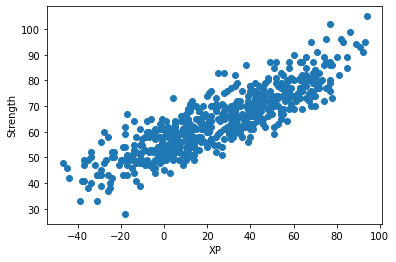

In [7]:
import matplotlib.pyplot as plt


# run the model with many agents
model = Village(n=600)
for i in range(100):
    model.step()

# read-out agent data from the model
data = np.asarray(list(map(lambda x: (x.xp, x.strength), model.schedule.agents)))

# plot the XP (x axis) and strength (y axis)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("XP")
plt.ylabel("Strength")
plt.show()

